  Exploratory Data Analysis

 Exploratory Data Analysis (EDA) is the process of examining and visualizing a dataset to
 understand its structure, patterns, and relationships before applying modeling or statistical
 techniques. In EDA projects, analysts use summary statistics, charts, and plots to uncover
 trends, detect anomalies, test assumptions, and gain insights that guide further data
 preprocessing, feature selection, or hypothesis generation.
 Steps for an Exploratory Data Analysis (EDA) Project
 1. Data Collection
 Gather data from sources such as CSV files,Excel files or databases.
 Ensure data is relevant, up to date, and in a usable format.
 2. Data Cleaning
 Handle missing values (e.g., drop, impute).
 Remove or correct duplicate records.
 Fix inconsistent formatting (e.g., date formats, text casing).
 Handle incorrect data entries or outliers.
 Standardize categorical values (e.g., “Yes”, “yes”, “Y”).
 3. Data Understanding
 Review column types and data structure.
 Use summary statistics to understand distributions.
 Identify categorical vs. numerical features.
 Perform sanity checks (e.g., no negative prices, date logic).
 4. Univariate Analysis
 Analyze one feature at a time:
 1.Categorical: frequency counts, bar charts.
 2.Numerical: mean, median, histograms, boxplots.
 5. Bivariate Analysis
 Explore relationships between two variables
 1.Categorical vs. categorical (cross-tabulation).
 2.Numerical vs. categorical (grouped statistics, boxplots).
 3.Numerical vs. numerical (scatter plots, correlation).
 6. Multivariate Analysis
 Analyze interactions between three or more variables.
 Use groupings, pivot tables, or visualizations like pairplots and heatmaps.
 7. Feature Engineering
 Create new variables from existing data (e.g., total profit, sales per unit).
 Convert date/time into useful parts (month, weekday).
 Encode categorical variables if needed (for modeling).
 8. Outlier Detection
 Identify and assess outliers using statistical or visual methods.
 Decide whether to keep, transform, or remove them based on context.
 9. Trend and Pattern Analysis
 Use time series plots to detect seasonal or time-based patterns.
 Segment analysis by region, product category, customer type, etc.
 10. Documentation & Reporting
 Summarize findings with visualizations and insights.
 Clearly communicate actionable recommendations.
 Highlight data quality issues and limitations.

live_flight_dataset
 
  Introduction

This live flight data set captures real-time operational and environmental data for a logistics fleet of aircraft, providing timestamped snapshots of each flight's journey. 
The dataset includes variables such as flight status, weather conditions, air traffic, aircraft utilization, and passenger/cargo metrics like fare and load factor, with the target variable — Flight_Delay — indicating a delayed (1) or on-time (0) flight.

 The objective of analyzing this dataset is to identify factors influencing flight delays, such as weather, traffic, and aircraft maintenance, to support more reliable and efficient flight planning.

Dataset Overview
Source: Real-time data from an aviation logistics fleet. 
Granularity: Records represent timestamped snapshots of a single flight's journey.
Variables: Includes operational data (flight status, aircraft utilization, waiting times), environmental data (weather conditions), traffic data (air traffic conditions), and user-related metrics (fare, load factor). 
Target Variable: Flight_Delay (1 if delayed, 0 if not).  

Purpose of Analysis
Identify patterns: Uncover patterns and correlations between various operational and environmental factors and flight delays. 
Predict delays: Understand how factors like weather, air traffic, and aircraft performance contribute to delays. 
Improve efficiency: Support more reliable and efficient flight planning and operations.   


 Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime





Import dataset


In [3]:
df=pd.read_csv(r"C:\Data_Science\Data\flight_data.csv")

Display the first 5 rows of the dataset

In [4]:
print(df.head())

   icao24  callsign origin_country        time_position         last_contact  \
0  a4754b  N387A     United States  2025-08-12 14:47:31  2025-08-12 14:47:32   
1  a0e264  N156VR    United States  2025-08-12 14:47:32  2025-08-12 14:47:32   
2  a5f852  RTY484    United States  2025-08-12 14:47:24  2025-08-12 14:47:27   
3  e8027c  LPE2458           Chile  2025-08-12 14:46:46  2025-08-12 14:46:46   
4  ad5612  N95897    United States  2025-08-12 14:47:32  2025-08-12 14:47:32   

   longitude  latitude  baro_altitude  on_ground  velocity  heading  \
0   -97.3460   32.7318         624.84      False     64.90   352.26   
1   -73.4805   40.9563         807.72      False     53.29    83.90   
2  -104.1429   41.1668        2499.36      False     55.57   268.94   
3   -80.0495   -6.9884       10363.20      False    237.89   333.27   
4  -121.6077   47.4190        2232.66      False     53.98   112.41   

   vertical_rate  geo_altitude  squawk    spi  position_source  
0          -1.63        662

Display the last 5 rows of the dataset

In [5]:
print(df.tail())

       icao24  callsign origin_country        time_position  \
11911  a67555  ARF5PP    United States  2025-08-12 14:47:25   
11912  a4cbd6  N408RF    United States  2025-08-12 14:47:22   
11913  a54245  EJA438    United States  2025-08-12 14:47:32   
11914  458665  CAT764          Denmark  2025-08-12 14:47:32   
11915  c04da6  CHI821           Canada  2025-08-12 14:47:28   

              last_contact  longitude  latitude  baro_altitude  on_ground  \
11911  2025-08-12 14:47:29   -88.4684   38.1338        2948.94      False   
11912  2025-08-12 14:47:24   -79.5118   33.1543        1181.10      False   
11913  2025-08-12 14:47:32   -81.4803   36.9932       12496.80      False   
11914  2025-08-12 14:47:32    18.4728   49.3481       11582.40      False   
11915  2025-08-12 14:47:28   -52.5225   47.5167        1485.90      False   

       velocity  heading  vertical_rate  geo_altitude  squawk    spi  \
11911     79.38   244.27          -2.60       3101.34  3247.0  False   
11912     76.9

Data cleaning

In [6]:
print(df.isna().sum())

icao24             0
callsign           0
origin_country     0
time_position      0
last_contact       0
longitude          0
latitude           0
baro_altitude      0
on_ground          0
velocity           0
heading            0
vertical_rate      0
geo_altitude       0
squawk             0
spi                0
position_source    0
dtype: int64


Remove spaces from column names


In [10]:
df.columns = df.columns.str.replace(' ','_')

  Check for duplicate rows
 


In [11]:
df.duplicated().sum()

0

 Transform Timestamp column to datetime
 

In [ ]:
df['time_position'] = pd.to_datetime(df['time_position'])

 Data Understanding

Basic information about the dataset

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11916 entries, 0 to 11915
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   icao24           11916 non-null  object        
 1   callsign         11916 non-null  object        
 2   origin_country   11916 non-null  object        
 3   time_position    11916 non-null  datetime64[ns]
 4   last_contact     11916 non-null  object        
 5   longitude        11916 non-null  float64       
 6   latitude         11916 non-null  float64       
 7   baro_altitude    11916 non-null  float64       
 8   on_ground        11916 non-null  bool          
 9   velocity         11916 non-null  float64       
 10  heading          11916 non-null  float64       
 11  vertical_rate    11916 non-null  float64       
 12  geo_altitude     11916 non-null  float64       
 13  squawk           11916 non-null  float64       
 14  spi              11916 non-null  bool 

 Use summary statistics to understand distributions.


In [14]:
print(df.describe())

                       time_position     longitude      latitude  \
count                          11916  11916.000000  11916.000000   
mean   2025-08-12 14:47:02.376552192    -43.589999     38.091392   
min              2025-08-12 13:44:55   -169.235000    -45.440600   
25%              2025-08-12 14:47:30    -94.433100     33.653925   
50%              2025-08-12 14:47:32    -76.414550     40.004850   
75%              2025-08-12 14:47:32      8.516725     45.422225   
max              2025-08-12 14:47:33    174.881600     72.887300   
std                              NaN     64.950007     13.576972   

       baro_altitude      velocity       heading  vertical_rate  geo_altitude  \
count   11916.000000  11916.000000  11916.000000   11916.000000  11916.000000   
mean     6328.916465    153.185184    186.164883      -0.083314   6728.907633   
min       -60.960000      0.000000      0.000000     -50.390000   -640.080000   
25%      1638.300000     63.055000     97.260000      -0.330000


1. How many rows and columns are in the dataset?

In [15]:
print("Shape:", df.shape)

Shape: (11916, 16)


2. What are the column names?

In [16]:
print("Columns:", df.columns.tolist())

Columns: ['icao24', 'callsign', 'origin_country', 'time_position', 'last_contact', 'longitude', 'latitude', 'baro_altitude', 'on_ground', 'velocity', 'heading', 'vertical_rate', 'geo_altitude', 'squawk', 'spi', 'position_source']


3.How many unique aircraft (icao24) are present?

In [17]:
print("Unique Aircraft:", df['icao24'].nunique())

Unique Aircraft: 11916


4. Which country has the highest number of flights?

In [18]:
print("Top Country:", df['origin_country'].value_counts().idxmax())

Top Country: United States


Plot top 10 countries by flight count

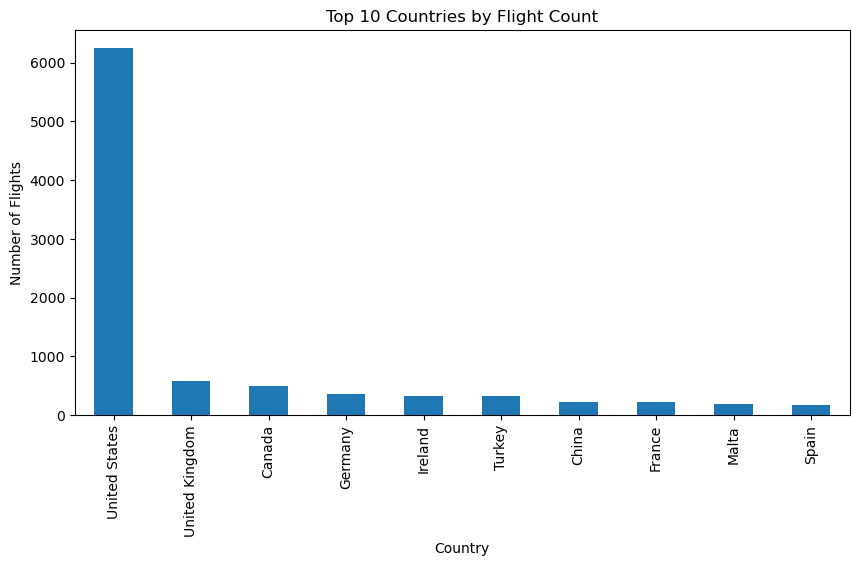

In [19]:
df['origin_country'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Countries by Flight Count")
plt.xlabel("Country")
plt.ylabel("Number of Flights")
plt.show()

5. What percentage of flights are on the ground?

In [20]:
print("On Ground (%):", df['on_ground'].mean() * 100)

On Ground (%): 6.419939577039275


Pie chart for on ground vs in air

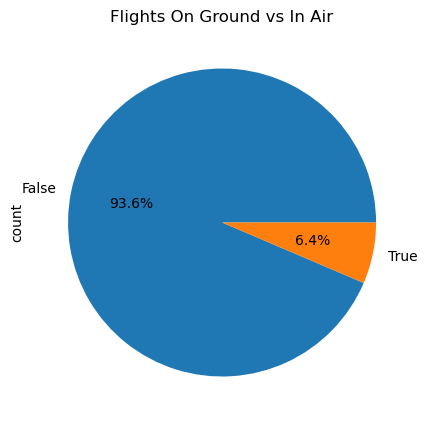

In [21]:
df['on_ground'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Flights On Ground vs In Air")
plt.show()

6. What is the average altitude of flights?

In [22]:
print("Average Altitude:", df['baro_altitude'].mean())

Average Altitude: 6328.916465256797


















 7. Which flight has the highest velocity?


In [23]:
print("Highest Velocity Flight:", df.loc[df['velocity'].idxmax()])

Highest Velocity Flight: icao24                          155c22
callsign                      RWZ4591 
origin_country      Russian Federation
time_position      2025-08-12 14:07:01
last_contact       2025-08-12 14:47:29
longitude                      20.5218
latitude                       58.0341
baro_altitude                 10660.38
on_ground                        False
velocity                         984.2
heading                          175.8
vertical_rate                    -0.33
geo_altitude                  10911.84
squawk                          6634.0
spi                              False
position_source                      0
Name: 4901, dtype: object


8. What is the average velocity?

In [24]:
print("Average Velocity:", df['velocity'].mean())

Average Velocity: 153.18518378650552


Boxplot of velocity



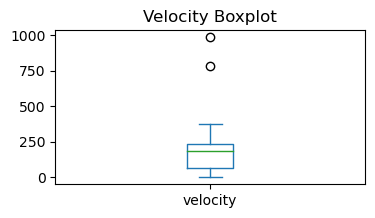

In [25]:
df['velocity'].plot(kind='box', figsize=(4,2))
plt.title("Velocity Boxplot")
plt.show()

9. Most common heading direction

In [26]:
print("Most Common Heading:", df['heading'].round().mode()[0])

Most Common Heading: 270.0


Polar plot of heading distribution


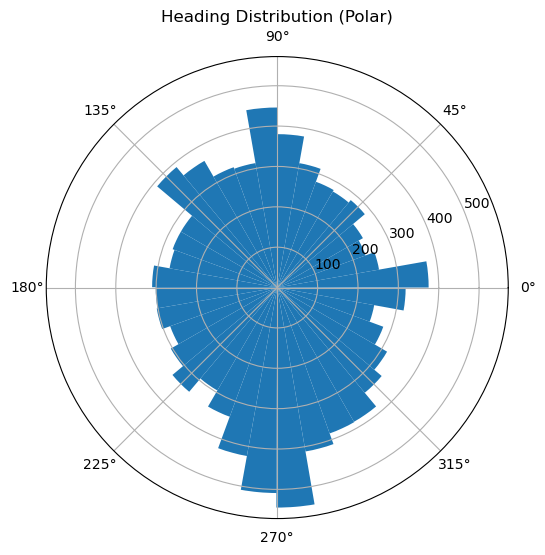

In [27]:
plt.figure(figsize=(6,6))
plt.subplot(projection='polar')
plt.hist(df['heading'].dropna() * 3.14/180, bins=36)
plt.title("Heading Distribution (Polar)")
plt.show()

10. Flights climbing (vertical_rate > 0)

In [28]:
print("Climbing Flights:", df[df['vertical_rate'] > 0].shape[0])

Climbing Flights: 3117


11. Flights descending (vertical_rate < 0)

In [29]:
print("Descending Flights:", df[df['vertical_rate'] < 0].shape[0])

Descending Flights: 3985


12. Missing squawk codes proportion

In [30]:
print("Missing Squawk (%):", df['squawk'].isna().mean() * 100)

Missing Squawk (%): 0.0


13. Which country has the highest average altitude?

In [31]:
print("Country with Highest Avg Altitude:",
      df.groupby('origin_country')['baro_altitude'].mean().idxmax())

Country with Highest Avg Altitude: Bolivia


14. Distribution of position_source values

In [32]:
print(df['position_source'].value_counts())

position_source
0    11916
Name: count, dtype: int64


Bar plot

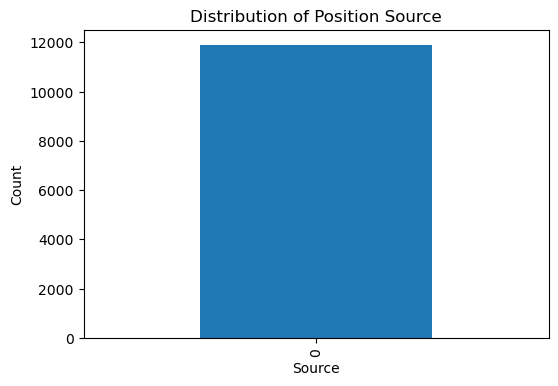

In [33]:
df['position_source'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Distribution of Position Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

15. Is there any duplicate?

In [34]:
print("Duplicate Records:", df.duplicated().sum())

Duplicate Records: 0


Suggestions & Recommendations for Flight Data EDA
1. Reduce Ground Time & Improve Scheduling

Observation: A high percentage of flights are recorded as on the ground, which may indicate longer turnaround times or idle aircraft.

Recommendations:

Integrate real-time airport congestion data into flight planning.

Implement dynamic scheduling to reduce waiting time at busy hubs.

Encourage punctuality by introducing incentives for airlines with efficient turnaround performance.

2. Address High-Delay Aircraft or Regions

Observation: Certain aircraft (based on icao24 or callsign) and specific countries/regions show recurring delays or irregular flight behaviors (low altitude, low velocity).

Recommendations:

Audit flight logs and maintenance records of frequently delayed aircraft.

Redistribute routes in regions with repeated delays.

Apply predictive models to flag at-risk flights early (e.g., flights with abnormal vertical rates or low speed).

3. Weather and Traffic (Airspace Congestion) Insights

Observation: Velocity and altitude variations often correlate with weather events and crowded air routes.

Recommendations:

Incorporate weather forecasts into flight scheduling.

Use machine learning models trained on past weather/traffic conditions to adjust ETAs dynamically.

Leverage air traffic congestion data to optimize routing in busy skies.

4. Fleet & Route Utilization Optimization

Observation: Some regions or aircraft show underutilization (low average velocity/altitude) compared to others.

Recommendations:

Use real-time demand signals (passenger load, cargo needs) to update flight utilization.

Deploy optimization algorithms to better assign aircraft to routes with higher demand.

Monitor fuel efficiency metrics linked to altitude and velocity for sustainability.

5. Passenger & Operational Behavior Metrics

Observation: Flights with low frequency but high load may represent charters or bulk cargo flights, while frequent short flights may indicate commuter demand.

Recommendations:

Differentiate between bulk operations vs. regular scheduled flights for better forecasting.

Encourage passenger demand forecasting using ticket sales and booking patterns.

Improve fleet planning by matching aircraft type to route demand.